## Data Science Major Project System.

### Online Retail Recommendation System

If you have tried online shopping, you must have noticed that when you are
checking out a product on an e-Commerce site, there is a list of suggested
products that you are presented with. In this project, you will develop a
recommendation system.

For this, we are attaching a dataset containing information about
recommendation systems for online retail data, so that we can understand what
type of product can be recommended.

We are providing a dataset from Kaggle, which contains historical information
about online retail data which can be usedto detect which product is highly
recommended. Below are all
the columns from the dataset we are using here

Invoice Number: This is the number that identifies a transaction.

Stock Code: This refers to the product ID.

Description: This describes the product that a user purchased.

Quantity: It specified the quantity of the item purchased.

Invoice Date: The date on which the transaction took place.

Unit Price: Price of one product.

Customer ID: It identifies the customer.

Country: The country where the transaction was performed.

Language Used: Python

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install mlxtend
# Mlxtend stands for Machine Learning Extensions. 
# It is a third-party Python library which contains many utilities and tools for machine learning and Data Science tasks, 
# including feature selection, ensemble methods, visualization, and model evaluation.

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules

### 1. Data Preprocessing

In [3]:
df = pd.read_excel("vnd.openxmlformats-officedocument.spreadsheetml.sheet&rendition=1.xlsx",sheet_name= "OnlineRetail")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 2. Exploratory Data Analysis (EDA)

In [5]:
df.shape

(541909, 8)

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303


### Handle Null Values

In [10]:
# Deleting features we dont need.

df.drop(columns=['CustomerID'], axis=1, inplace=True)

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [12]:
df.isnull().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

In [13]:
# We have enough data so we can delete them. We could fill them with mean, mode etc. It depends on our strategy

df.dropna(subset='Description',axis=0, inplace=True)

In [14]:
df.reset_index(drop=True, inplace=True)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [15]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540455 entries, 0 to 540454
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    540455 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.9+ MB


### Handling Outliers

In [17]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,540455.0,9.603129,-80995.0,1.0,3.0,10.0,80995.0,218.007598
InvoiceDate,540455,2011-07-04 16:20:42.947035392,2010-12-01 08:26:00,2011-03-28 11:49:00,2011-07-20 11:38:00,2011-10-19 11:49:00,2011-12-09 12:50:00,NaN
UnitPrice,540455.0,4.623519,-11062.06,1.25,2.08,4.13,38970.0,96.889628


There is negative value when we look at the quantity and unit price, so let's examine and deal with it first

In [18]:
inv = df["InvoiceNo"].str.contains("C",na=False).sum()
print(f"The number of INVOICES containing 'C' : {inv}")

The number of INVOICES containing 'C' : 9288


In [19]:
def cancelledInvoice(x):
    if ('C' in str(x)):
        return np.nan
    else:
        return x

In [20]:
# Deleting datas that includes C in Invoice. Because if it includes 'C', it means the product returned.

df ['InvoiceNo'] = df['InvoiceNo'].apply(lambda x:cancelledInvoice(x))

In [21]:
df.isnull().sum()

InvoiceNo      9288
StockCode         0
Description       0
Quantity          0
InvoiceDate       0
UnitPrice         0
Country           0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540455 entries, 0 to 540454
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531167 non-null  object        
 1   StockCode    540455 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     540455 non-null  int64         
 4   InvoiceDate  540455 non-null  datetime64[ns]
 5   UnitPrice    540455 non-null  float64       
 6   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.9+ MB


In [23]:
df.dropna(subset='InvoiceNo', axis=0, inplace=True)

In [24]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [25]:
def cleanInvoice (x):
    if(str(x).isdigit()!=True or len(str(x)) !=6):
        return np.nan
    else:
        return x

In [26]:
# Invoice data cant be 6 digit and it must be numeric. 

df['InvoiceNo']=df['InvoiceNo'].apply(lambda x: cleanInvoice(x))

In [27]:
df.isnull().sum()

InvoiceNo      3
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531167 entries, 0 to 540454
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531164 non-null  float64       
 1   StockCode    531167 non-null  object        
 2   Description  531167 non-null  object        
 3   Quantity     531167 non-null  int64         
 4   InvoiceDate  531167 non-null  datetime64[ns]
 5   UnitPrice    531167 non-null  float64       
 6   Country      531167 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 32.4+ MB


In [29]:
df.dropna(subset='InvoiceNo',axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531164 entries, 0 to 531163
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531164 non-null  float64       
 1   StockCode    531164 non-null  object        
 2   Description  531164 non-null  object        
 3   Quantity     531164 non-null  int64         
 4   InvoiceDate  531164 non-null  datetime64[ns]
 5   UnitPrice    531164 non-null  float64       
 6   Country      531164 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 28.4+ MB


In [31]:
df["InvoiceNo"] = df["InvoiceNo"].astype('int64').astype(str)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 531164 entries, 0 to 531163
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531164 non-null  object        
 1   StockCode    531164 non-null  object        
 2   Description  531164 non-null  object        
 3   Quantity     531164 non-null  int64         
 4   InvoiceDate  531164 non-null  datetime64[ns]
 5   UnitPrice    531164 non-null  float64       
 6   Country      531164 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 28.4+ MB


In [33]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,531164.0,10.293676,-9600.0,1.0,3.0,10.0,80995.0,159.301807
InvoiceDate,531164,2011-07-04 19:55:06.271509248,2010-12-01 08:26:00,2011-03-28 12:13:00,2011-07-20 12:41:30,2011-10-19 12:54:00,2011-12-09 12:50:00,NaN
UnitPrice,531164.0,3.879001,0.0,1.25,2.08,4.13,13541.33,32.514222


In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [35]:
qtt = df.loc[df["Quantity"]<0,"Quantity"].count()
print(f"The number of negative QUANTITY values: {qtt}")

The number of negative QUANTITY values: 474


In [36]:
up=df.loc[df["UnitPrice"]<0,"UnitPrice"].count()
up

0

In [37]:
# Eliminate Quantity data that are less then 0 

df=df[(df['Quantity'] > 0)]

In [38]:
df.reset_index(drop=True, inplace=True)

In [39]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [40]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom
...,...,...,...,...,...,...,...
530685,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,France
530686,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,France
530687,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,France
530688,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,France


In [41]:
qtt = df.loc[df["Quantity"]<0,"Quantity"].count()
print(f"The number of negative QUANTITY values: {qtt}")

The number of negative QUANTITY values: 0


In [42]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,530690.0,10.605873,1.0,1.0,3.0,10.0,80995.0,156.638294
InvoiceDate,530690,2011-07-04 19:01:04.928526848,2010-12-01 08:26:00,2011-03-28 11:59:00,2011-07-20 12:14:00,2011-10-19 12:35:00,2011-12-09 12:50:00,NaN
UnitPrice,530690.0,3.882466,0.0,1.25,2.08,4.13,13541.33,32.528533


Negative price values also improved

Second, lets deal with outlier values using interquantile range

### INTERQUARTILE RANGE

What is interquantile range?

In descriptive statistics, the interquartile range (IQR) is a measure of statistical dispersion, which is the spread of the data. The IQR may also be called the midspread, middle 50%, fourth spread, or H‑spread. It is defined as the difference between the 75th and 25th percentiles of the data

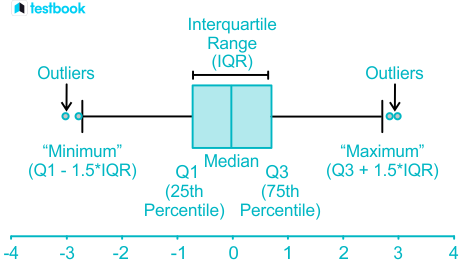.

In [43]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [44]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'Country'],
      dtype='object')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: >

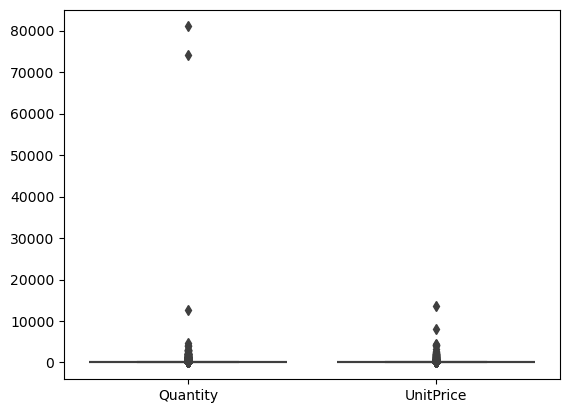

In [45]:
# We can see is there outliers in our dataset by using boxplot.

sns.boxplot(df[['Quantity','UnitPrice']])

In [46]:
def handling_outlier(df,variable):
    quartile1 = df[variable].quantile(0.01) 
    quartile3 = df[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    df.loc[df[variable] < low_limit, variable] = low_limit
    df.loc[df[variable] > up_limit, variable] = up_limit

In [47]:
handling_outlier(df,"Quantity")
handling_outlier(df,"UnitPrice")

In [48]:
df.reset_index(drop=True, inplace=True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,United Kingdom
...,...,...,...,...,...,...,...
530685,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,France
530686,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,France
530687,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,France
530688,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,France


In [54]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Quantity,13870.0,24.662581,1.0,6.0,12.0,24.0,248.5,40.976859
InvoiceDate,13870,2011-07-08 00:36:02.080749824,2010-12-01 08:45:00,2011-03-31 10:27:00,2011-07-29 13:28:00,2011-10-12 11:22:00,2011-12-09 12:50:00,NaN
UnitPrice,13870.0,3.210857,0.0,1.06,1.65,3.75,42.015,4.430928


##### they look good

In [50]:
# Selecting some countries from the data set
list_cntry = ["Greece","Singapore","Netherlands","Switzerland","Cyprus","France","Korea","Canada"]
for number,country in enumerate(list_cntry):
    list_cntry[number] = df[df['Country'] == country]

In [51]:
del df
df = pd.concat(list_cntry,axis=0)
df = df.sort_index()

In [52]:
df = df.reset_index(drop=True)
df.shape

(13870, 7)

In [53]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24.0,2010-12-01 08:45:00,3.75,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24.0,2010-12-01 08:45:00,3.75,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12.0,2010-12-01 08:45:00,3.75,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12.0,2010-12-01 08:45:00,0.85,France
4,536370,21883,STARS GIFT TAPE,24.0,2010-12-01 08:45:00,0.65,France
...,...,...,...,...,...,...,...
13865,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12.0,2011-12-09 12:50:00,0.85,France
13866,581587,22899,CHILDREN'S APRON DOLLY GIRL,6.0,2011-12-09 12:50:00,2.10,France
13867,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4.0,2011-12-09 12:50:00,4.15,France
13868,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4.0,2011-12-09 12:50:00,4.15,France


### 2.1 Data Analysis & Visualization

In [55]:
# Top 10 best selling products

product_count = df.groupby("Description")["Quantity"].sum().nlargest(10)
product_count=product_count.reset_index()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


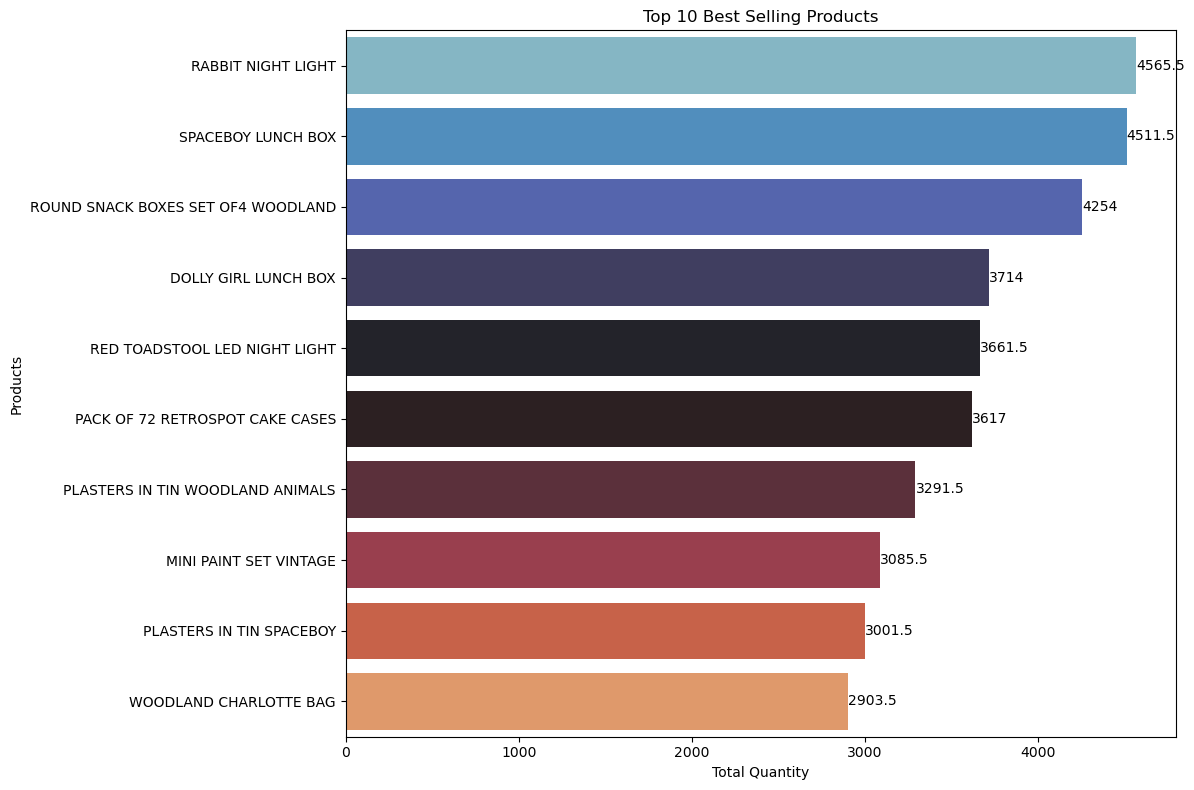

In [56]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(data=product_count,y="Description",x="Quantity",palette="icefire")

for i in ax.containers:
    ax.bar_label(i,)

ax.set_title("Top 10 Best Selling Products")
plt.xlabel("Total Quantity")
plt.ylabel("Products")
plt.tight_layout()
plt.show()

In [57]:
# Price of any product by country

list_country, list_price = [], []
for col in df["Country"].unique():
    price = df.loc[(df["Country"] == col) & (df["Description"] == "WHITE HANGING HEART T-LIGHT HOLDER"), "UnitPrice"].mean()

    list_country.append(col)
    list_price.append(round(price,3))

df_price = pd.DataFrame(columns=["Country"],data=list_price,index=list_country)
df_price.dropna(inplace=True)
df_price = df_price.sort_values(by="Country",ascending=False)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


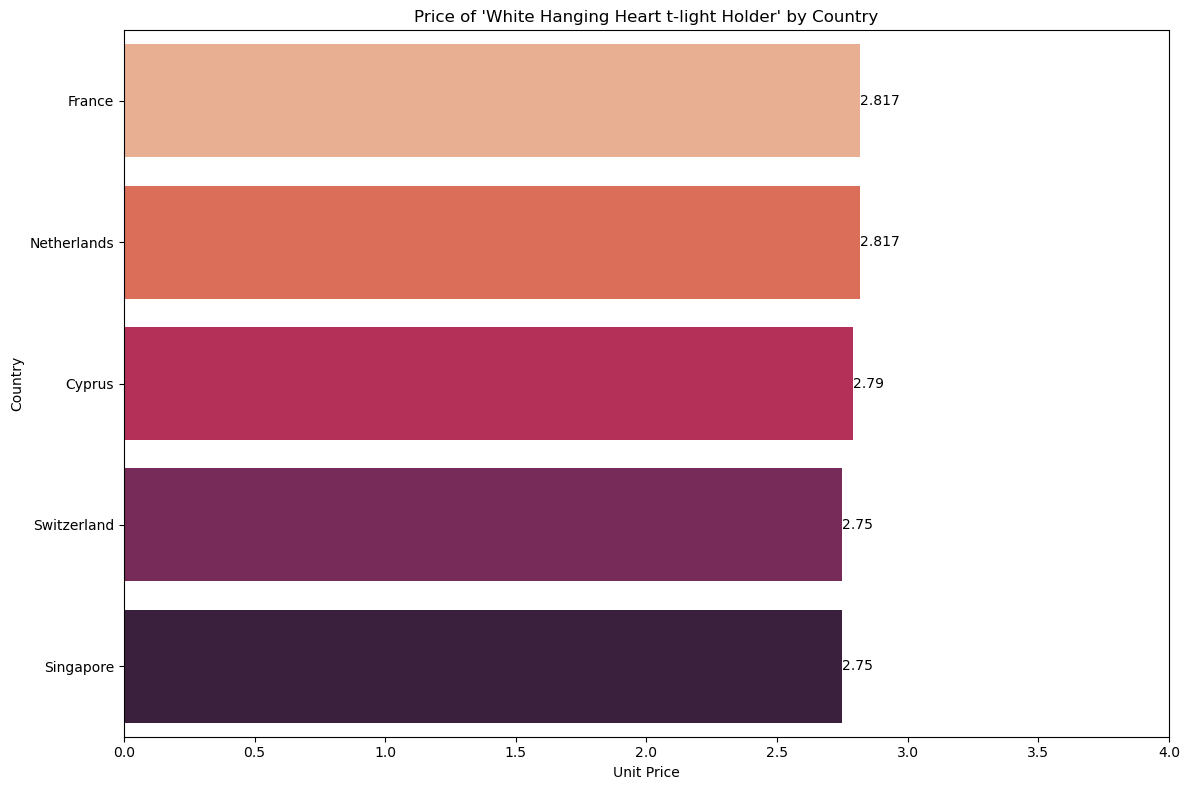

In [58]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(data=df_price,y=df_price.index,x="Country",palette="rocket_r")

for i in ax.containers:
    ax.bar_label(i,)

ax.set_title("Price of 'White Hanging Heart t-light Holder' by Country")
plt.xlim(0, 4)
plt.xlabel("Unit Price")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

In [59]:
# Total amount of the first 10 products

df["TOTAL_AMOUNT"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TOTAL_AMOUNT
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24.0,2010-12-01 08:45:00,3.75,France,90.0
1,536370,22727,ALARM CLOCK BAKELIKE RED,24.0,2010-12-01 08:45:00,3.75,France,90.0
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12.0,2010-12-01 08:45:00,3.75,France,45.0
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12.0,2010-12-01 08:45:00,0.85,France,10.2
4,536370,21883,STARS GIFT TAPE,24.0,2010-12-01 08:45:00,0.65,France,15.6


In [60]:
total_amount = df.groupby("Description")["TOTAL_AMOUNT"].sum().nlargest(10)
total_amount=total_amount.reset_index()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


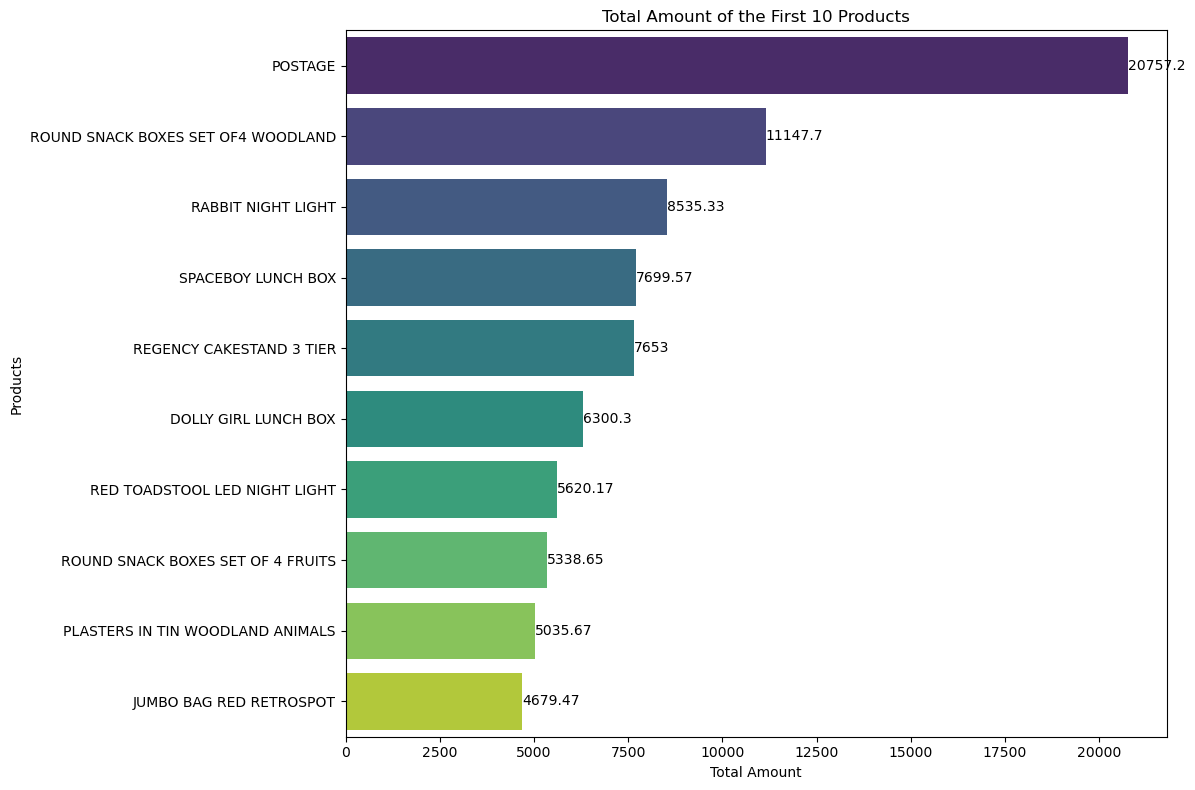

In [61]:
plt.figure(figsize=(12, 8))

ax = sns.barplot(data=total_amount,y="Description",x="TOTAL_AMOUNT",palette="viridis")

for i in ax.containers:
    ax.bar_label(i,)

ax.set_title("Total Amount of the First 10 Products")
plt.xlabel("Total Amount")
plt.ylabel("Products")
plt.tight_layout()
plt.show()

### 3. Preparing the ARL Data Structure0.

### Invoice-Product Matrix

Setting it so that there are invoices in the rows and products in the columns. If there are products, 1, otherwise 0.

In [62]:
# Reaching the product quantities in each invoice.
df.groupby(["InvoiceNo","Description"])["Quantity"].sum().head(20)

# if you want you can use this code, it gives same result
# df.groupby(["INVOICE","DESCRIPTION"]).agg({"QUANTITY":"sum"}).head(20)

InvoiceNo  Description                       
536370     ALARM CLOCK BAKELIKE GREEN            12.0
           ALARM CLOCK BAKELIKE PINK             24.0
           ALARM CLOCK BAKELIKE RED              24.0
           CHARLOTTE BAG DOLLY GIRL DESIGN       20.0
           CIRCUS PARADE LUNCH BOX               24.0
           INFLATABLE POLITICAL GLOBE            48.0
           LUNCH BOX I LOVE LONDON               24.0
           MINI JIGSAW CIRCUS PARADE             24.0
           MINI JIGSAW SPACEBOY                  24.0
           MINI PAINT SET VINTAGE                36.0
           PANDA AND BUNNIES STICKER SHEET       12.0
           POSTAGE                                3.0
           RED TOADSTOOL LED NIGHT LIGHT         24.0
           ROUND SNACK BOXES SET OF4 WOODLAND    24.0
           SET 2 TEA TOWELS I LOVE LONDON        24.0
           SET/2 RED RETROSPOT TEA TOWELS        18.0
           SPACEBOY LUNCH BOX                    24.0
           STARS GIFT TAPE          

In [63]:
# Sorting descriptions by columns
df.groupby(["InvoiceNo", "Description"]).agg({"Quantity": "sum"}).unstack().iloc[0:5, 0:5]

Quantity                             \
Description 10 COLOUR SPACEBOY PEN 12 COLOURED PARTY BALLOONS   
InvoiceNo                                                       
536370                         NaN                        NaN   
536403                         NaN                        NaN   
536852                         NaN                        NaN   
536858                         NaN                        NaN   
536974                         NaN                        NaN   

                                                                       \
Description 12 EGG HOUSE PAINTED WOOD 12 MESSAGE CARDS WITH ENVELOPES   
InvoiceNo                                                               
536370                            NaN                             NaN   
536403                            NaN                             NaN   
536852                            NaN                             NaN   
536858                            NaN                             NaN   
536974                            NaN                             NaN   

                                           
Description 12 PENCIL SMALL TUBE WOODLAND  
InvoiceNo                                  
536370                                NaN  
536403                                NaN  
536852                                NaN  
536858                                NaN  
536974                                NaN

In [64]:
# Filling nan values with zero
df.groupby(['InvoiceNo', 'Description']).agg({"Quantity": "sum"}).unstack().fillna(0).iloc[0:5, 0:5]

Quantity                             \
Description 10 COLOUR SPACEBOY PEN 12 COLOURED PARTY BALLOONS   
InvoiceNo                                                       
536370                         0.0                        0.0   
536403                         0.0                        0.0   
536852                         0.0                        0.0   
536858                         0.0                        0.0   
536974                         0.0                        0.0   

                                                                       \
Description 12 EGG HOUSE PAINTED WOOD 12 MESSAGE CARDS WITH ENVELOPES   
InvoiceNo                                                               
536370                            0.0                             0.0   
536403                            0.0                             0.0   
536852                            0.0                             0.0   
536858                            0.0                             0.0   
536974                            0.0                             0.0   

                                           
Description 12 PENCIL SMALL TUBE WOODLAND  
InvoiceNo                                  
536370                                0.0  
536403                                0.0  
536852                                0.0  
536858                                0.0  
536974                                0.0

In [65]:
# 0,0 is converted to 0, if there is a value then it is 1
df.groupby(['InvoiceNo', 'Description']).agg({"Quantity": "sum"}).unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0).iloc[0:5, 0:5]

Quantity                             \
Description 10 COLOUR SPACEBOY PEN 12 COLOURED PARTY BALLOONS   
InvoiceNo                                                       
536370                           0                          0   
536403                           0                          0   
536852                           0                          0   
536858                           0                          0   
536974                           0                          0   

                                                                       \
Description 12 EGG HOUSE PAINTED WOOD 12 MESSAGE CARDS WITH ENVELOPES   
InvoiceNo                                                               
536370                              0                               0   
536403                              0                               0   
536852                              0                               0   
536858                              0                               0   
536974                              0                               0   

                                           
Description 12 PENCIL SMALL TUBE WOODLAND  
InvoiceNo                                  
536370                                  0  
536403                                  0  
536852                                  0  
536858                                  0  
536974                                  0

In [66]:
# Changing product names with stock code
df.groupby(['InvoiceNo', 'StockCode']).agg({"Quantity": "sum"}).unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0).iloc[0:5, 0:5]

Quantity                        
StockCode    10002 10120 10125 10133 10135
InvoiceNo                                 
536370           1     0     0     0     0
536403           0     0     0     0     0
536852           0     0     0     0     0
536858           0     0     0     0     0
536974           0     0     0     0     0

In [67]:
# It ready !!
df_arl = df.groupby(['InvoiceNo', 'StockCode']).agg({"Quantity": "sum"}).unstack().fillna(0).applymap(lambda x: 1 if x > 0 else 0)

In [68]:
# Finding product name from stock code
def prdct_name_finder(data,stckcde):
    product_name = data[data["StockCode"] == stckcde][["Description"]].values[0].tolist()
    print(product_name)
prdct_name_finder(df,"85014A")

['BLACK/BLUE POLKADOT UMBRELLA']


##### it works

### 4. Association Rule Analysis

What is Association Rule?

Association rule mining finds interesting associations and relationships among large sets of data items. This rule shows how frequently a itemset occurs in a transaction. A typical example is a Market Based Analysis. 

In [69]:
frequent_itemsets = apriori(df_arl,min_support=0.01,use_colnames=True)

C:\Users\dshem\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [70]:
frequent_itemsets.sort_values("support", ascending=False)

,support,itemsets
625,0.648696,"((Quantity, POST))"
206,0.182609,"((Quantity, 22326))"
274,0.165217,"((Quantity, 22554))"
118,0.161739,"((Quantity, 21731))"
276,0.154783,"((Quantity, 22556))"
...,...,...
11317,0.010435,"((Quantity, 23173), (Quantity, 22423), (Quanti..."
11319,0.010435,"((Quantity, 23204), (Quantity, 22423), (Quanti..."
11320,0.010435,"((Quantity, 23209), (Quantity, 22423), (Quanti..."
11322,0.010435,"((Quantity, 23254), (Quantity, 22423), (Quanti..."


In [71]:
rules = association_rules(frequent_itemsets,metric="support",min_threshold=0.01)

In [72]:
# Filtering
rules[(rules["support"]>0.05) & (rules["confidence"]>0.1) & (rules["lift"]>5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1722,"((Quantity, 21086))","((Quantity, 21080))",0.104348,0.109565,0.074783,0.716667,6.541005,0.063350,3.142711,0.945812
1723,"((Quantity, 21080))","((Quantity, 21086))",0.109565,0.104348,0.074783,0.682540,6.541005,0.063350,2.821304,0.951354
1724,"((Quantity, 21094))","((Quantity, 21080))",0.100870,0.109565,0.078261,0.775862,7.081281,0.067209,3.972709,0.955126
1725,"((Quantity, 21080))","((Quantity, 21094))",0.109565,0.100870,0.078261,0.714286,7.081281,0.067209,3.146957,0.964453
1888,"((Quantity, 21094))","((Quantity, 21086))",0.100870,0.104348,0.092174,0.913793,8.757184,0.081648,10.389565,0.985183
1889,"((Quantity, 21086))","((Quantity, 21094))",0.104348,0.100870,0.092174,0.883333,8.757184,0.081648,7.706832,0.989009
7018,"((Quantity, 22629))","((Quantity, 22630))",0.144348,0.113043,0.086957,0.602410,5.329008,0.070639,2.230830,0.949390
7019,"((Quantity, 22630))","((Quantity, 22629))",0.113043,0.144348,0.086957,0.769231,5.329008,0.070639,3.707826,0.915882
7644,"((Quantity, 22726))","((Quantity, 22727))",0.076522,0.074783,0.060870,0.795455,10.636892,0.055147,4.523285,0.981060
7645,"((Quantity, 22727))","((Quantity, 22726))",0.074783,0.076522,0.060870,0.813953,10.636892,0.055147,4.963696,0.979216


In [73]:
# Filtering by confidence
rules[(rules["support"]>0.05) & (rules["confidence"]>0.1) & (rules["lift"]>5)].sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
23574,"((Quantity, 21080), (Quantity, 21086))","((Quantity, 21094))",0.074783,0.100870,0.073043,0.976744,9.683240,0.065500,38.662609,0.969209
87891,"((Quantity, 21080), (Quantity, POST), (Quantit...","((Quantity, 21094))",0.057391,0.100870,0.055652,0.969697,9.613375,0.049863,29.671304,0.950530
87890,"((Quantity, 21094), (Quantity, POST), (Quantit...","((Quantity, 21086))",0.059130,0.104348,0.055652,0.941176,9.019608,0.049482,15.226087,0.945009
23573,"((Quantity, 21094), (Quantity, 21080))","((Quantity, 21086))",0.078261,0.104348,0.073043,0.933333,8.944444,0.064877,13.434783,0.963612
25288,"((Quantity, 21094), (Quantity, POST))","((Quantity, 21086))",0.074783,0.104348,0.069565,0.930233,8.914729,0.061762,12.837681,0.959586
1888,"((Quantity, 21094))","((Quantity, 21086))",0.100870,0.104348,0.092174,0.913793,8.757184,0.081648,10.389565,0.985183
8596,"((Quantity, 23254))","((Quantity, 23256))",0.074783,0.083478,0.066087,0.883721,10.586240,0.059844,7.882087,0.978730
1889,"((Quantity, 21086))","((Quantity, 21094))",0.104348,0.100870,0.092174,0.883333,8.757184,0.081648,7.706832,0.989009
52716,"((Quantity, 22727), (Quantity, 22728))","((Quantity, 22726))",0.057391,0.076522,0.050435,0.878788,11.484160,0.046043,7.618696,0.968507
52715,"((Quantity, 22726), (Quantity, 22728))","((Quantity, 22727))",0.059130,0.074783,0.050435,0.852941,11.405609,0.046013,6.291478,0.969660


### 5. Application


For example, a member purchased a product with stock code 85123A ...

In [74]:
def prdct_name_finder(data,stckcde):
    product_name = data[data["StockCode"] == stckcde][["Description"]].values[0].tolist()
    return product_name

In [75]:
def arl_recommender(rules_df, product_id, rec_count):
    
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    recommendation_list_name = []
    
    for i, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j[1] == product_id:
                for k in list(sorted_rules.iloc[i]["consequents"]):
                    if k[1] not in recommendation_list:
                        recommendation_list.append(k[1])
    added_product = prdct_name_finder(df,product_id)
    print(f"Added to Cart:           {added_product[0]}\n\n")
    print(f"Members Who Bought This Also Bought:\n\n")
    for i in range(0,rec_count):
        recommendation_list_name.append(prdct_name_finder(df,recommendation_list[i]))
        print(f"                         {recommendation_list_name[i][0]}\n")

In [81]:
arl_recommender(rules, "84997C", 3)

Added to Cart:           BLUE 3 PIECE POLKADOT CUTLERY SET


Members Who Bought This Also Bought:


                         RED 3 PIECE RETROSPOT CUTLERY SET

                         GREEN 3 PIECE POLKADOT CUTLERY SET

                         POSTAGE



In [83]:
arl_recommender(rules, "15056BL", 3)

Added to Cart:           EDWARDIAN PARASOL BLACK


Members Who Bought This Also Bought:


                         EDWARDIAN PARASOL RED

                         POSTAGE

                         RED RETROSPOT UMBRELLA

